In [1]:
import os

def adjust_wkdir(cut_folder='notebook'):
    abspath = os.path.abspath('.')
    wk_dir = abspath.replace(cut_folder,'')
    os.chdir(wk_dir)
    return wk_dir


adjust_wkdir()

'/share/felix/pj/lung_classify/'

In [7]:
import pandas as pd
import os
from task_distribute.locker import task_locker
from file_cache.cache import file_cache, logger, timed

#from tqdm._tqdm_notebook import tqdm_notebook as  tqdm

from tqdm import tqdm, tqdm_notebook
from glob import glob
import itertools
import numpy as np
from easydict import EasyDict as edict

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)



In [22]:
df = pd.read_csv('./input/train_bboxes.csv')
gp = df.groupby('filename').x.count().sort_index()

count_img = len(glob('./input/train/*.jpg'))
print(df.shape, gp.shape, count_img)


(7167, 5) (4509,) 20013


['./input/train/8755.jpg', './input/train/158.jpg', './input/train/1570.jpg', './input/train/4223.jpg', './input/train/312.jpg', './input/train/9240.jpg', './input/train/9708.jpg', './input/train/19325.jpg']


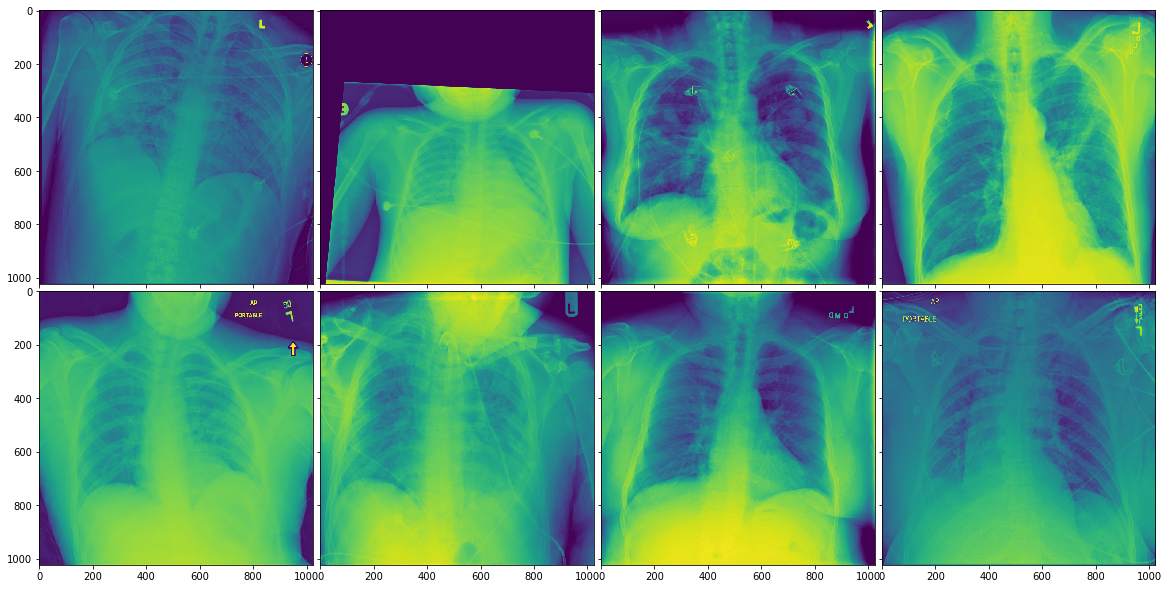

In [16]:
import matplotlib.pyplot as plt
from glob import glob

file_list = list(glob('./input/train/*.jpg'))[:8]
print(file_list)
img_list = [plt.imread (file) for file in file_list]


from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(figsize=(20., 50.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2,4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 share_all=True,
                 )

for ax, im in zip(grid, img_list):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
